<a href="https://colab.research.google.com/github/shahd1995913/Tahalf-Mechine-Learning-DS3/blob/main/ML1_S1%26S2_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML1-S1&S2 (Linear Regression)👨🏻‍💻
---

### Agenda
- [Linear Regression](#Linear_Regression)
- [Simple Linear Regression (SLR)](#SLR)
- [Error and cost Functions](#Functions)
- [Gredient Descent](#Gredient)
- [SLR Example](#SLR_Example)
- [Linear regression From scratch](#LR_scratch)
- [MLR Example](#MLR_Example)

## <a id='Linear_Regression'></a> `Linear Regression`
---
Linear regression is the simplest regression algorithm that attempts to model the relationship between dependent variable and one or more independent variables by fitting a linear equation/best fit line to observed data.
Based on the number of input features, Linear regression could be of two types:

* **Simple Linear Regression (SLR)**
* **Multiple Linear Regression (MLR)**

<img src= "https://raw.githubusercontent.com/michaelhaar/Intro-to-Linear-Regression-and-Gradient-Descent/master/Linear_regression_files/gradient_descent_example.gif" width=500/>

## <a id='SLR'></a> `Simple Linear Regression (SLR)`
---
In Simple Linear Regression (SLR), we will have a single input variable based on which we predict the output variable. Where in Multiple Linear Regression (MLR), we predict the output based on multiple inputs.
Input variables can also be termed as Independent/predictor variables, and the output variable is called the dependent variable.

<img src="https://www.empirical-methods.hslu.ch/files/2017/02/regression-equation-simple-regression.png" width=600 />

This algorithm explains the linear relationship between the dependent(output) variable y and the independent(predictor) variable X using a straight line  
```Y= B0 + B1 X.```

## <a id='Functions'></a> `Error and cost Functions`
---
Ok thats the linear Regression model , But **how do we train it ?**


well training a model means detting its parameters so that the model best fits the training set. So we first need a measure of how well (or poorly) the model fits. 

**The best fit line is a line that has the least error which means the error between predicted values and actual values should be minimum.**


- In regression, the difference between the observed value of the dependent variable `yi` and the predicted value(predicted) is called the residuals.

    ```εi =  ypredicted –   yi```

    where ```ypredicted =   B0 + B1 Xi```


### Cost Function :
---
The cost function helps to work out the optimal values for `B0` and `B1`, which provides the best fit line for the data points.
In Linear Regression, generally Mean Squared Error (MSE) cost function is used, which is the average of squared error that occurred between the `ypredicted` and `yi`.

- We calculate **MSE** using simple linear equation **`y=mx+b`**


<img src=https://miro.medium.com/max/1198/1*BtVajQNj29LkVySEWR_4ww.png width = 400>

- then **`ŷ`** can be expanded into :

<img src= https://github.com/michaelhaar/Intro-to-Linear-Regression-and-Gradient-Descent/raw/b4b446b9d884b7f840a2bddbdfecc42834799396//Linear_regression_files/sum_of_squared_errors.png width = 400>

**NOTE😉**: `Using the MSE function, we’ll update the values of` **`B0`** and **`B1`** `such that the MSE value settles at the minima.  These parameters can be determined using the gradient descent method such that the value for the cost function is minimum.`

## <a id='Gredient'></a>`Gredient Descent`
---
**So how actually we tweak the weights `B0` and `B1` ?** we will use the Algorithms that called optimizers

- Gradient Descent is one of the optimization algorithms that optimize the cost function(objective function) to reach the optimal minimal solution.

    - To find the optimum solution we need to reduce the cost function(MSE) for all data points. 
 
    - This is done by updating the values of B0 and B1 iteratively until we get an optimal solution.

 
- A regression model optimizes the gradient descent algorithm to update the coefficients of the line by reducing the cost function by randomly selecting coefficient values and then iteratively updating the values to reach the minimum cost function

So basically we are trying to find the values for b and m where the error is the smallest. Calculating the error for every single m and b value is usually very computation intensive and therefor we are using this Gradient Descent algorithm.

👉 **Remember, the gradient of a function gives us the direction of the steepest ascent.**

<img src=https://github.com/michaelhaar/Intro-to-Linear-Regression-and-Gradient-Descent/raw/b4b446b9d884b7f840a2bddbdfecc42834799396//Linear_regression_files/gradient_descent_illustration.png width = 600>

**So in short: `The gradient of our error function tells us how to update our optimization parameters. The gradient can be calculated as follows:`**

<img src="https://github.com/michaelhaar/Intro-to-Linear-Regression-and-Gradient-Descent/raw/b4b446b9d884b7f840a2bddbdfecc42834799396//Linear_regression_files/partial_error_derivatives.png" width = 400>

For more details check : [reference link](https://towardsdatascience.com/gradient-descent-explained-9b953fc0d2c)

## <a id='SLR_Example'></a>`SLR Example`
---
- Lets start with an example implementing Simple Linear regression using sklearn.

- The dataset we will be using is a **simple students scores dataset**, with one feature (studying Hours) and the `output label` is the score student achieved.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# to make sure all students have the same results 
random_val = 123
#import the train test split function
from sklearn.model_selection import train_test_split
#import the linear regression function
from sklearn.linear_model import LinearRegression
#import metrics
from sklearn import metrics

### Load the dataset and perform some investigations
---

In [2]:
dataset_path = '/content/student_scores.csv'
dataset = pd.read_csv(dataset_path)
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
dataset.shape

(25, 2)

In [4]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


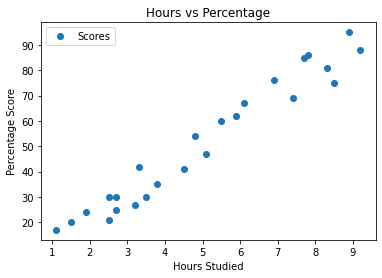

In [5]:
dataset.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [6]:
# select the feature in a variable called X 
X = dataset.iloc[:, :-1].values
# select the output into a variable called y 
y = dataset.iloc[:, 1].values

### split the dataset into train and test
---
<img src="https://www.researchgate.net/profile/Brian-Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png" width = 400>

In [7]:
#split data to 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.25, random_state = random_val)

### Create model object and fit the data
---

In [10]:
# make an object initialization of Linear regression
model = LinearRegression()
# fit the train data
model.fit(X_train, y_train)

LinearRegression()

### visualize the fitted line for training data
---

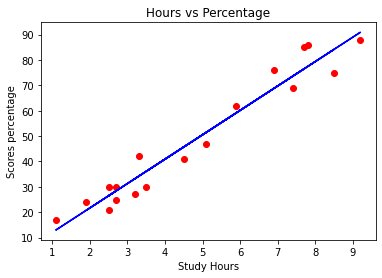

In [9]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage')
plt.xlabel('Study Hours')
plt.ylabel('Scores percentage')
plt.show()

### predict and visualize test data
---

In [11]:
y_pred = model.predict(X_test)

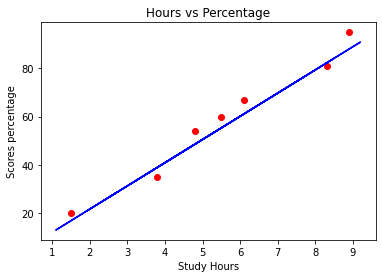

In [12]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Hours vs Percentage')
plt.xlabel('Study Hours')
plt.ylabel('Scores percentage')
plt.show()

### Model Error 
---
**We will be presenting the Error of our fitted model using (MSE)**

In [20]:
# call the mean  squared error 
from sklearn.metrics import mean_squared_error
my_MSE = mean_squared_error(y_test,y_pred)
print(my_MSE)

23.019217337139764


### Now Your Turn 
---
Create **`MSE`** from scratch called `custom_mse`, make sure that it returns the same result


In [22]:
###################### Exercise ##########################
### Start Your Code Here
 ### MSE = (1/n) * Σ (actual – prediction)2
custom_mse = np.square(np.subtract(y_test,y_pred)).mean()
custom_mse
### End Your Code Here

23.019217337139764

In [23]:
if sk_MSE == my_MSE :
    print( "Well Done ")
else :
    print("Try again")


Well Done 


### Model score
---
Using **`Coefficient of Determination`** or **`R-Squared (R2)`** 

- R-Squared is a number that explains the amount of variation that is explained/captured by the developed model. It always ranges between 0 & 1 . Overall, the higher the value of R-squared, the better the model fits the data.

    - Mathematically it can be represented as: **R2 = 1 – ( RSS/TSS )**


- Residual sum of Squares (RSS) is defined as the sum of squares of the residual for each data point in the plot/data. It is the measure of the difference between the expected and the actual observed output.


- Total Sum of Squares (TSS) is defined as the sum of errors of the data points from the mean of the response variable.

    - Mathematically TSS is where `y hat` is the mean of the sample data points.
    

<img src="./imgs/R2.png" width = 800>

In [24]:
# lets check the model r2 score on the test dataset 
model.score(X_test,y_test)

0.9593798023076978

## <a id='LR_scratch'></a>`Linear regression From scratch`
---

In [25]:
class LinearRegression:
    def __init__(self, learning_rate=0.0001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        print(X.shape)
        # init parameters start with zeros ? or random numbers ?
        # self.weights = np.zeros(n_features) # zero initialization
        # self.weights = np.random.uniform(size=n_features) # uniform dest
        self.weights = np.random.normal(size=n_features) # normal dest
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            
            # compute gradients
            dw = (-2 / n_samples) * np.dot(X.T, (y_predicted - y) )
            db = (-2 / n_samples) * np.sum(y_predicted - y)
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_ = np.dot(X, self.weights) + self.bias
        
        return y_

In [26]:
regressor = LinearRegression(learning_rate=0.000000001, n_iters=100)
regressor.fit(X_train, y_train)


(18, 1)


## <a id='MLR_Example'></a>MLR Example
---
- Multiple linear regression is a technique to understand the relationship between a single dependent variable and multiple independent variables.

- The formulation for multiple linear regression is also similar to simple linear regression with the small change that instead of having one beta variable,

**You will now have betas for all the variables used. The formula is given as:**
` Y = B0 + B1X1 + B2X2 + … + BpXp + ε `

<img src="https://miro.medium.com/max/1187/1*jOjxZ5g0RFJN0PqdR-G-Ug.png" width=600>

⚫ **Here is an example for the fitting process for a linear regression using an optimizer such as gredient descent.**

**This graph only contains two features for the simplicity of visualization.**
<img src="https://miro.medium.com/max/936/1*o_ZrNQXcd9sUEqfSRti8LQ.gif" width=600>


### Dataset 
---
We will be using `startups` dataset. 

envestigate the dataset and find out how many feature the dataset has. 

In [28]:
# set dataset path
startup_path =  '/content/startups.csv'
# load the dataset csv using pandas 
startup_dataset = pd.read_csv(startup_path)
startup_dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Load features X and labels y
---

In [29]:
# use only these features : `R&D Spend` 	`Administration` 	`Marketing Spend`
X = startup_dataset.iloc[:, :-2].values
y = startup_dataset.iloc[:, 4].values

### Splitting train and test
---

In [30]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### Fit the data
---

In [31]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

### Predict and check scores
---

In [32]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [33]:
#import metrics
# call the mean  squared error 
print(metrics.mean_squared_error(y_test,y_pred))
print(metrics.r2_score(y_test,y_pred))

72767199.14073583
0.9325475204846337


In [34]:
regressor.score(X_test,y_test)

0.9325475204846337

## Learning rate image : 

<img src="https://miro.medium.com/max/977/0*svH5eeB6JalWU7YQ.png" width=400>